In [117]:
import numpy as np


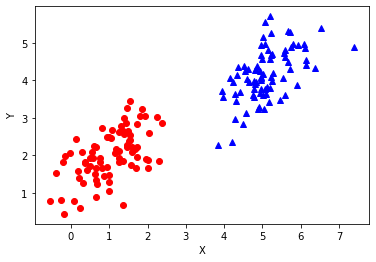

((2, 80), (2, 80))

In [315]:
# step 1: sinh data
means = [[1, 2], [5, 4]]
cov = [[.4, .2], [.2, .4]]
N = 80
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T 
X = np.concatenate((X0, X1), axis = 1) 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# vẽ các điểm trên toạ độ 
import matplotlib.pyplot as plt
plt.plot(X[0][:N],X[1][:N],'ro')
plt.plot(X[0][N:],X[1][N:],'b^')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() 
# thêm X0=1 vào vector input X 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
X = X.T
y = y.T
X0.shape, X1.shape  



In [316]:
# # step 2: xây dựng các hàm f, loss, derivative   
# # hàm tính tất cả các điểm
# # X là ma trận chứa tất cả các điểm 

# giá trị của y mà âm => -1
# giá trị của y mà dương => 1
def f(X, w):
    result=np.dot(X,w) # w0 + w1*x1 + w2*x2 = y_value
    y_pred = [] 
    # check nếu f(x) >= thì label là 1 và ngược lại là -1
    for y_value in result:
        if y_value >= 0:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    return np.array(y_pred).reshape(-1,1)  


In [317]:
# hàm loss
# loss dựa trên y_predict và y_true 
def loss(X, w):
    y1 = f(X,w) # giá trị value thật 
    y_pre = []
    y_new = [] 
    for index in range(len(y1)): 
        # chỉ tính dựa trên các điểm bị classify sai
        if np.sign(y1[index]) != np.sign(y[index]):
            y_pre.append(y1[index]) # y predict 
            y_new.append(y[index])  # y đúng 
    t = np.sum(-np.multiply(y_pre,y_new)) 
    return t 

In [318]:
# hàm derivative 
def derivative(X): 
    y_sub = -y
    d1 = np.dot(y_sub.T,X)
    return d1[0]
print(derivative(X))

print(y.T.shape,X.shape) 

[  0.         324.83659118 172.46108098]
(1, 160) (160, 3)



# Vẽ 2d

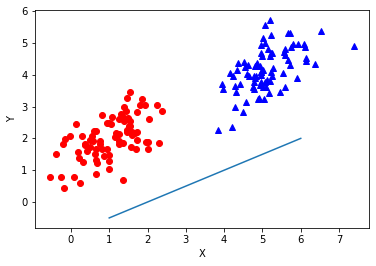

In [319]:
# # vẽ đường w1x1 + w2x2 + w0x0 = 0 ban đầu
w = [2,-1,2]
X1 = X.T[1:] 
plt.plot(X1[0][:N],X1[1][:N],'ro') # X1[0][:N] are red dots
plt.plot(X1[0][N:],X1[1][N:],'b^') # X1[0][N:] are blue triangles
plt.xlabel('X')
plt.ylabel('Y')

x1 = np.linspace(start=1, stop=6, num=50)
x2 =  (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2)

plt.show()

# Vẽ 3d

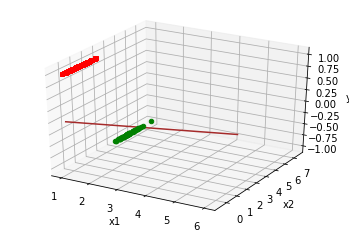

In [320]:
#plot
w = [2,-1,2]
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d') 
for i in range(len(X)):
    if y[i] ==1:
        ax.scatter(X[i][0], X[i][1], y[i], c='r', marker='s')
    else:
        ax.scatter(X[i][0], X[i][1], y[i], c='g', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

x1 = np.linspace(start=1, stop=6, num=100) 
x2 = (-w[0]-w[1]*x1)/w[2]
ax.plot(x1,x2,'brown') 

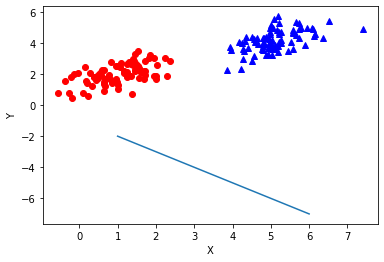

new_loss 80.0 time 0


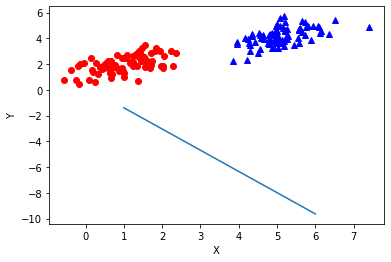

new_loss 78.0 time 1


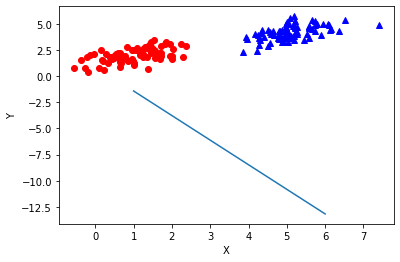

new_loss 76.0 time 1


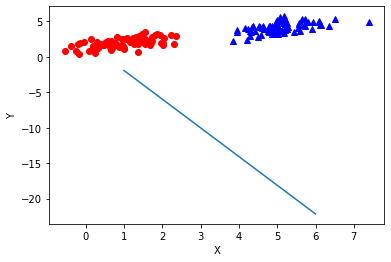

new_loss 71.0 time 1


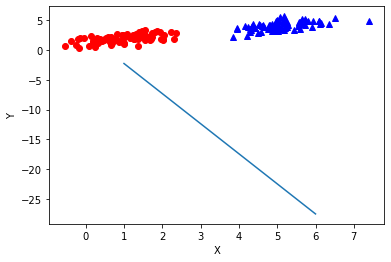

new_loss 69.0 time 1


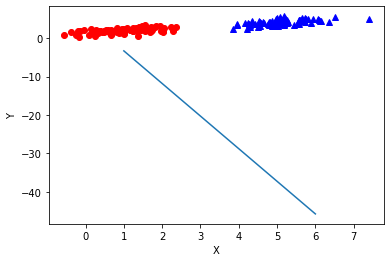

new_loss 64.0 time 1


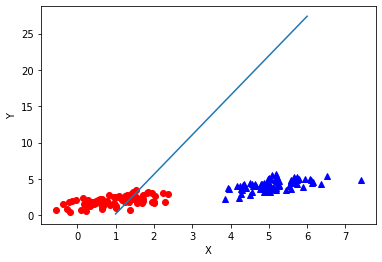

new_loss 26.0 time 1


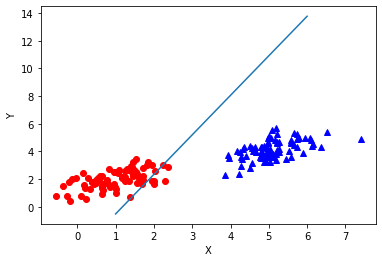

new_loss 5.0 time 1


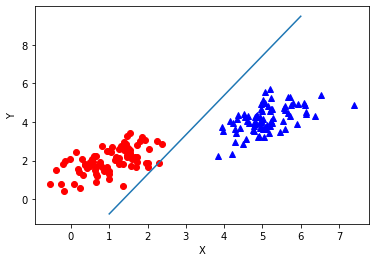

new_loss 1.0 time 1


In [321]:
# step 3: training  
w = np.ones(X.shape[1]).reshape(-1,1) 
learning_rate = 0.1
epoch = 10
old_loss = -10
d = derivative(X).reshape(-1,1)
for i in range(epoch): 
    for index in range(len(X)):   
        Xi = np.copy(X[index]) # w0 + w1x1 + w2x2 + ...
#         print(Xi,Xi.shape)
        x = np.array(Xi.reshape(1,3)) 
#         print(x)
        y1 = np.dot(x,w)[0][0]  
#         print(y1,y1.shape)
        # chỉ tính những point bị classify sai 
        # => vì mình dùng 1 để thể hiện label cho nên nếu đã hết điểm bị classify sai thì loss sẽ = 0 
        if old_loss != loss(X,w):
            old_loss = loss(X,w) 
            draw(w)
            print("new_loss",old_loss,"time",i)
        if np.sign(y1) != np.sign(y[index]):
            w = w + learning_rate*(-y1*Xi.reshape(3,1))
        

In [322]:
##### step 4: testing 
def draw(w):
    X1 = X.T[1:] 
    plt.plot(X1[0][:N],X1[1][:N],'ro') # X1[0][:N] are red dots
    plt.plot(X1[0][N:],X1[1][N:],'b^') # X1[0][N:] are blue triangles
    plt.xlabel('X')
    plt.ylabel('Y')

    x1 = np.linspace(start=1, stop=6, num=50)
    x2 =  (-w[0]-w[1]*x1)/w[2]
    plt.plot(x1,x2)

    plt.show()


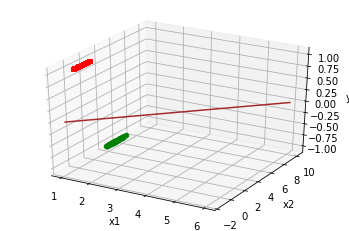

In [314]:
#plot
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d') 
for i in range(len(X)):
    if y[i] ==1:
        ax.scatter(X[i][0], X[i][1], y[i], c='r', marker='s')
    else:
        ax.scatter(X[i][0], X[i][1], y[i], c='g', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

x1 = np.linspace(start=1, stop=6, num=100) 
x2 = (-w[0]-w[1]*x1)/w[2]
ax.plot(x1,x2,'brown') 